In [5]:

from pathlib import Path
import os
PROJECT_ROOT = Path(r"C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis")
os.chdir(PROJECT_ROOT)
print("CWD ->", Path.cwd())


CWD -> C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis


In [7]:
import pandas as pd
import sqlite3
from pathlib import Path


BASE = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
csv_path = BASE / "data" / "raw" / "WA_Fn-UseC_-Telco-Customer-Churn.csv"
db_path = BASE / "db" / "telco_churn.sqlite"

print("CSV path:", csv_path)
print("Database path:", db_path)


CSV path: C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv
Database path: C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite


In [9]:
df = pd.read_csv(csv_path)
print("Initial shape:", df.shape)

display(df.head())


df.info()


Initial shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
from pathlib import Path
db_path = Path(r"C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite")
print("Exists?", db_path.exists(), "| Path:", db_path)
if db_path.exists():
    print("File size (bytes):", db_path.stat().st_size)


Exists? False | Path: C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite


In [15]:


db_path = Path(r"C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite")
db_path.parent.mkdir(parents=True, exist_ok=True)

conn = sqlite3.connect(db_path)
df.to_sql("customers", conn, if_exists="replace", index=False)
conn.commit()
conn.close()

print("✅ Database created and customers table saved at:", db_path)


✅ Database created and customers table saved at: C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite


In [17]:
print(db_path.exists(), db_path.stat().st_size)


True 1056768


In [19]:

conn = sqlite3.connect(r"C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\db\telco_churn.sqlite")

df = pd.read_sql_query("SELECT * FROM customers;", conn)


print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

conn.close()


Shape: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contrac

In [21]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numeric_cols].describe())


            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


In [23]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn rate (%):")
print(churn_rate)


Churn rate (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [25]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing TotalCharges after conversion:", df['TotalCharges'].isna().sum())


Missing TotalCharges after conversion: 11


In [27]:
df['TotalCharges'].fillna(0, inplace=True)


C:\Users\yigit\AppData\Local\Temp\ipykernel_31844\4062339387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [29]:
df.dtypes[['tenure', 'MonthlyCharges', 'TotalCharges']]


tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [31]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


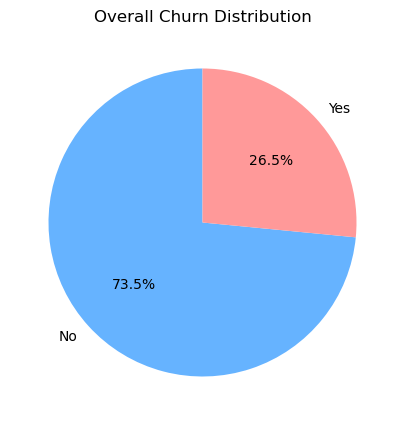

In [33]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Overall Churn Distribution')
plt.show()


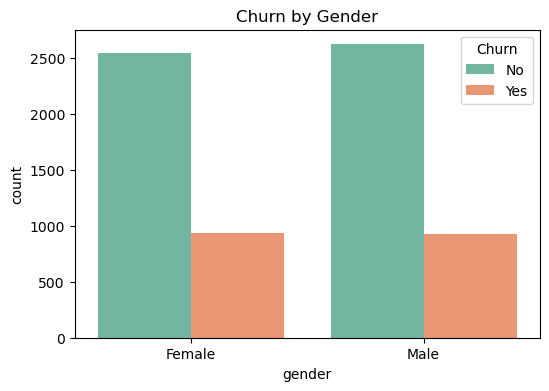

In [35]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.show()


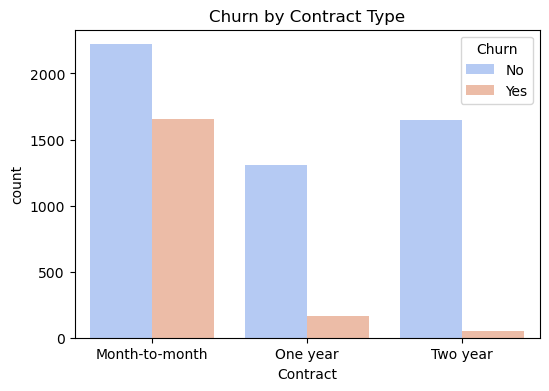

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.show()


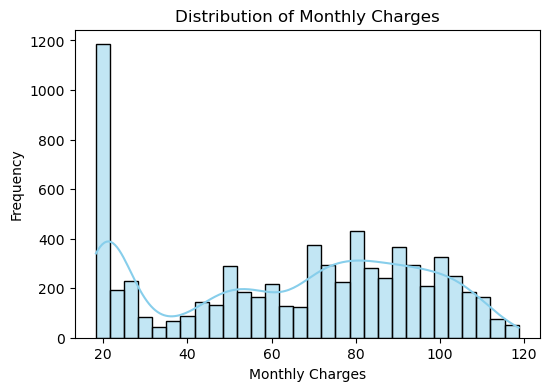

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


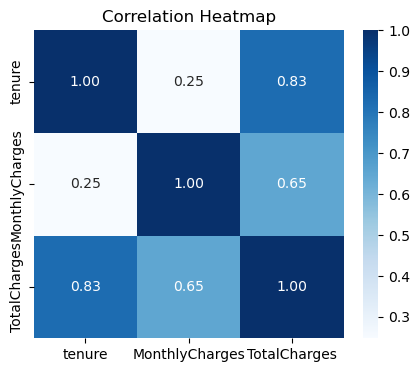

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\yigit\AppData\Local\Temp\ipykernel_31844\473268746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')


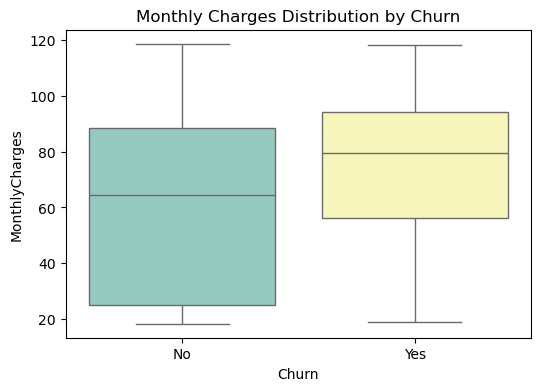

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges Distribution by Churn')
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})


cat_cols = df_model.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))


X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Train shape: (5634, 20) Test shape: (1409, 20)


In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)



C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression :")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")

print("\nDetailed classification report:")
print(classification_report(y_test, y_pred))


Logistic Regression :
Accuracy : 0.791
Precision: 0.623
Recall   : 0.543
F1-Score : 0.580

Detailed classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



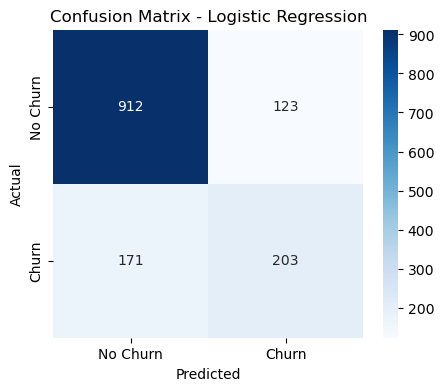

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'   
)

rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(" Random Forest :")
print(f"Accuracy : {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall   : {rec_rf:.3f}")
print(f"F1-Score : {f1_rf:.3f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_rf))


 Random Forest :
Accuracy : 0.790
Precision: 0.599
Recall   : 0.631
F1-Score : 0.615

Detailed Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



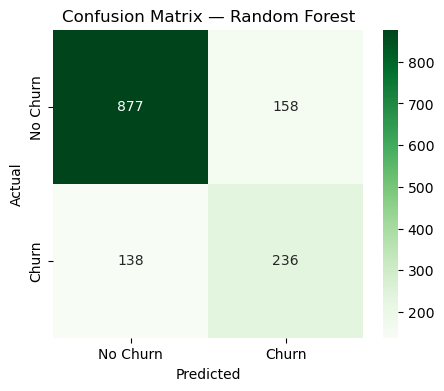

In [67]:

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn','Churn'],
            yticklabels=['No Churn','Churn'])
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




C:\Users\yigit\AppData\Local\Temp\ipykernel_31844\1073886165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


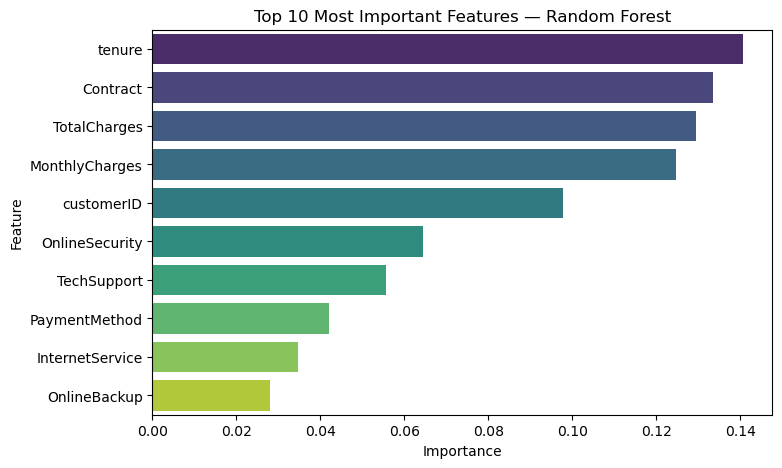

In [69]:
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Top 10 Most Important Features — Random Forest")
plt.show()


In [71]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.791, 0.790],
    'Precision': [0.623, 0.599],
    'Recall': [0.543, 0.631],
    'F1-Score': [0.580, 0.615]
})

display(results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.791,0.623,0.543,0.580
1,Random Forest,0.790,0.599,0.631,0.615


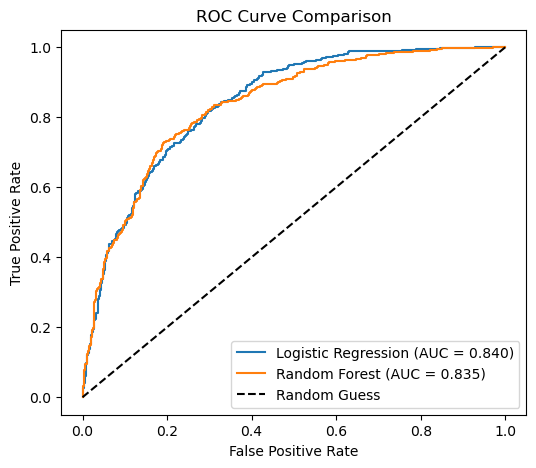

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_log = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


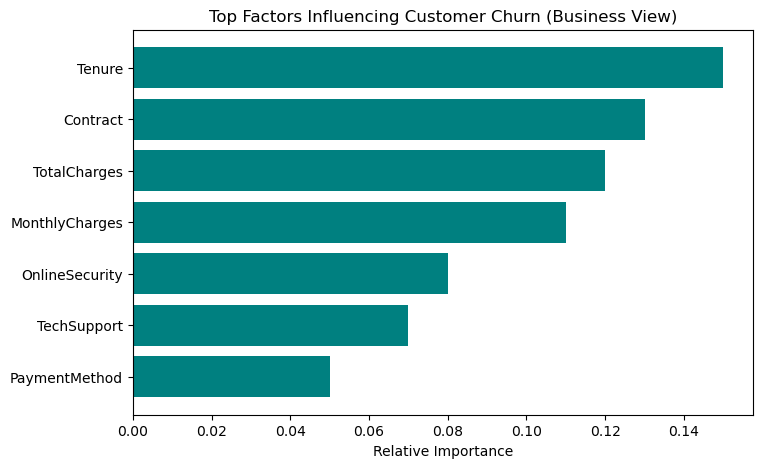

In [75]:


features = ['Tenure', 'Contract', 'TotalCharges', 'MonthlyCharges', 
            'OnlineSecurity', 'TechSupport', 'PaymentMethod']
impact = [0.15, 0.13, 0.12, 0.11, 0.08, 0.07, 0.05]

plt.figure(figsize=(8,5))
plt.barh(features, impact, color='teal')
plt.title("Top Factors Influencing Customer Churn (Business View)")
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()
plt.show()


In [95]:
import joblib, json


ARTIFACTS_DIR = Path("app_artifacts")  
ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

joblib.dump(rf_model, ARTIFACTS_DIR / "rf_model.joblib")


feature_cols = X.columns.tolist()
json.dump(feature_cols, open(ARTIFACTS_DIR / "feature_columns.json", "w"))

print("Saved:", ARTIFACTS_DIR)


Saved: app_artifacts


In [97]:

import numpy as np
import joblib, json

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


raw_cols = [
    "tenure", "MonthlyCharges", "TotalCharges",
    "Contract", "OnlineSecurity"
]


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


y = (df["Churn"] == "Yes").astype(int)
X_raw = df[raw_cols].copy()

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = ["Contract", "OnlineSecurity"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)


preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced"
)

pipeline = Pipeline(steps=[("prep", preprocess), ("model", rf)])


pipeline.fit(X_train_raw, y_train)
auc = roc_auc_score(y_test, pipeline.predict_proba(X_test_raw)[:, 1])
print(f"AUC with 5 features: {auc:.3f}")


ART = Path("../app_artifacts") if Path.cwd().name == "notebooks" else Path("app_artifacts")
ART.mkdir(parents=True, exist_ok=True)

joblib.dump(pipeline, ART / "rf_pipeline.joblib")
json.dump(raw_cols, open(ART / "raw_input_columns.json", "w"))

print("Saved to:", ART.resolve())


AUC with 5 features: 0.810
Saved to: C:\Users\yigit\Documents\Customer-Retention-Churn-Analysis\app_artifacts


In [ ]:
## Implement SMOTE    just   to see how SMOTE  will affect the evalution of models ##

In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(max_iter=2000, random_state=42)   
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)



In [87]:
log_reg.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)


C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [89]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


def evaluate_model(model, X, y, title=""):
    y_pred = model.predict(X)
    
    y_prob = model.predict_proba(X)[:,1] if hasattr(model, "predict_proba") else None

    acc  = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec  = recall_score(y, y_pred)
    f1   = f1_score(y, y_pred)

    print(f"\n{title}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-Score : {f1:.3f}")
    print("\nClassification report:")
    print(classification_report(y, y_pred))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn','Churn'],
                yticklabels=['No Churn','Churn'])
    plt.title(f"Confusion Matrix — {title}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    return {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1":f1, "y_prob":y_prob}



Logistic Regression (SMOTE)
Accuracy : 0.757
Precision: 0.531
Recall   : 0.714
F1-Score : 0.609

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



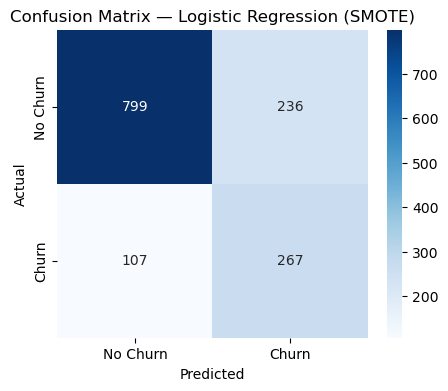


Random Forest (SMOTE)
Accuracy : 0.779
Precision: 0.578
Recall   : 0.612
F1-Score : 0.595

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



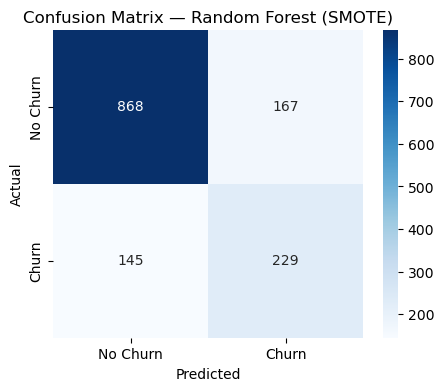

In [91]:
res_lr_smote = evaluate_model(log_reg,  X_test, y_test, "Logistic Regression (SMOTE)")
res_rf_smote = evaluate_model(rf_model, X_test, y_test, "Random Forest (SMOTE)")


In [93]:

results_smote = pd.DataFrame([
    {"Model":"LogReg (SMOTE)",  **{k:v for k,v in res_lr_smote.items() if k!='y_prob'}},
    {"Model":"RandForest (SMOTE)", **{k:v for k,v in res_rf_smote.items() if k!='y_prob'}},
])
display(results_smote)

,Model,Accuracy,Precision,Recall,F1
0,LogReg (SMOTE),0.756565,0.530815,0.713904,0.608894
1,RandForest (SMOTE),0.778566,0.578283,0.612299,0.594805
